In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import datetime as dt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [2]:
tf.random.set_seed(36)

## Dataset

In [3]:
BASE_DIR_PATH = '../Datasets/typhoons'
TRAIN_PATH = os.path.join(BASE_DIR_PATH, 'train')
VAL_PATH = os.path.join(BASE_DIR_PATH, 'val')
TEST_PATH = os.path.join(BASE_DIR_PATH, 'test')

In [4]:
def load_files(file_path):
    '''
    Loading the files from file_path as pandas DataFrames and combining them
    '''
    file_names = os.listdir(file_path)
    print(file_names)
    
    df = None
    
    for i, file in enumerate(file_names):
        if i == 0:
            df = pd.read_csv(os.path.join(file_path, file))
        else:
            tmp = pd.read_csv(os.path.join(file_path, file))
            df = pd.concat([df, tmp])
    
    return df

In [5]:
def load_test_files(df_list, file_path):
    '''
    Loading the files from file_path into a list called df_list as pandas DataFrames
    '''
    file_names = os.listdir(file_path)
    print(file_names)
    
    for file in file_names:
        tmp = pd.read_csv(os.path.join(file_path, file))
        df_list.append(tmp)

In [6]:
train_df = load_files(TRAIN_PATH)
train_df

['ambo_2016.csv', 'auring_2017.csv', 'bising_2017.csv', 'butchoy_2016.csv', 'carina_2016.csv', 'crising_2017.csv', 'dante_2017.csv', 'dindo_2016.csv', 'emong_2017.csv', 'enteng_2016.csv', 'fabian_2017.csv', 'ferdie_2016.csv', 'gener_2016.csv', 'helen_2016.csv', 'igme_2016.csv', 'julian_2016.csv', 'karen_2016.csv', 'lawin_2016.csv', 'marce_2016.csv', 'nina_2016.csv']


,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,8448,2016-06-26 00:00:00,6,26,0,0.0,Montalban,0,0,0,0,0,0,20.52,8.918747,615.60,0.014488,0.035,0.002000
1,8449,2016-06-26 00:00:00,6,26,0,0.0,Sto_Nino,14420,0,0,0,0,0,11.95,15.963477,788.70,0.020240,0.033,0.000667
2,8450,2016-06-26 01:00:00,6,26,1,3600.0,Montalban,0,0,0,0,0,0,20.52,8.918747,615.60,0.014488,0.035,0.002000
3,8451,2016-06-26 01:00:00,6,26,1,3600.0,Sto_Nino,14420,0,0,0,0,0,11.95,15.963477,788.70,0.020240,0.033,0.000667
4,8452,2016-06-26 02:00:00,6,26,2,7200.0,Montalban,0,0,0,0,0,0,20.51,8.829671,615.30,0.014350,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,17323,2016-12-27 21:00:00,12,27,21,421200.0,Sto_Nino,14420,0,0,0,0,0,12.68,36.547660,836.88,0.043671,0.033,0.000667
236,17324,2016-12-27 22:00:00,12,27,22,424800.0,Montalban,0,0,0,0,0,0,21.50,23.628236,645.00,0.036633,0.035,0.002000
237,17325,2016-12-27 22:00:00,12,27,22,424800.0,Sto_Nino,14420,0,0,0,0,0,12.67,36.166567,836.22,0.043250,0.033,0.000667
238,17326,2016-12-27 23:00:00,12,27,23,428400.0,Montalban,0,0,0,0,0,0,21.50,23.628236,645.00,0.036633,0.035,0.002000


In [7]:
val_df = load_files(VAL_PATH)
val_df

['gorio_2017.csv', 'isang_2017.csv', 'jolina_2017.csv', 'kiko_2017.csv', 'lannie_2017.csv', 'nando_2017.csv', 'odette_2017.csv']


,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,27360,2017-07-25 00:00:00,7,25,0,0.0,Montalban,0,0,0,0,0,0,21.32,19.783987,639.60,0.030932,0.035,0.002000
1,27361,2017-07-25 00:00:00,7,25,0,0.0,Sto_Nino,14420,0,0,0,0,0,12.47,29.190037,823.02,0.035467,0.033,0.000667
2,27362,2017-07-25 01:00:00,7,25,1,3600.0,Montalban,0,0,0,0,0,0,22.37,55.264986,671.10,0.082350,0.035,0.002000
3,27363,2017-07-25 01:00:00,7,25,1,3600.0,Sto_Nino,14420,0,0,0,0,0,12.51,30.490564,825.66,0.036929,0.033,0.000667
4,27364,2017-07-25 02:00:00,7,25,2,7200.0,Montalban,0,0,0,0,1,0,22.72,77.481767,681.60,0.113676,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,31339,2017-10-15 21:00:00,10,15,21,421200.0,Sto_Nino,14420,0,0,0,0,0,12.79,40.956736,844.14,0.048519,0.033,0.000667
236,31340,2017-10-15 22:00:00,10,15,22,424800.0,Montalban,0,0,0,0,0,0,21.68,28.202195,650.40,0.043361,0.035,0.002000
237,31341,2017-10-15 22:00:00,10,15,22,424800.0,Sto_Nino,14420,0,0,0,0,0,12.77,40.124861,842.82,0.047608,0.033,0.000667
238,31342,2017-10-15 23:00:00,10,15,23,428400.0,Montalban,0,0,0,0,0,0,21.67,27.926745,650.10,0.042958,0.035,0.002000


In [8]:
test_data = []
load_test_files(test_data, TEST_PATH)

test_data[0]

['paolo_2017.csv', 'quedan_2017.csv', 'ramil_2017.csv', 'salome_2017.csv', 'tino_2017.csv', 'urduja_2017.csv', 'vinta_2017.csv']


,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,31344,2017-10-16 00:00:00,10,16,0,0.0,Montalban,0,0,0,0,0,0,21.67,27.926745,650.10,0.042958,0.035,0.002000
1,31345,2017-10-16 00:00:00,10,16,0,0.0,Sto_Nino,14420,0,0,0,0,0,12.74,38.902552,840.84,0.046266,0.033,0.000667
2,31346,2017-10-16 01:00:00,10,16,1,3600.0,Montalban,0,0,0,0,0,0,21.66,27.653933,649.80,0.042558,0.035,0.002000
3,31347,2017-10-16 01:00:00,10,16,1,3600.0,Sto_Nino,14420,0,0,0,0,0,12.71,37.710339,838.86,0.044954,0.033,0.000667
4,31348,2017-10-16 02:00:00,10,16,2,7200.0,Montalban,0,0,0,0,0,0,21.66,27.653933,649.80,0.042558,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,31675,2017-10-22 21:00:00,10,22,21,594000.0,Sto_Nino,14420,0,0,0,0,0,12.31,24.425672,812.46,0.030064,0.033,0.000667
332,31676,2017-10-22 22:00:00,10,22,22,597600.0,Montalban,0,0,0,0,0,0,21.38,20.991782,641.40,0.032728,0.035,0.002000
333,31677,2017-10-22 22:00:00,10,22,22,597600.0,Sto_Nino,14420,0,0,0,0,0,12.31,24.425672,812.46,0.030064,0.033,0.000667
334,31678,2017-10-22 23:00:00,10,22,23,601200.0,Montalban,0,0,1,1,0,0,21.38,20.991782,641.40,0.032728,0.035,0.002000


In [9]:
train_df = train_df.sample(frac=1)
val_df = val_df.sample(frac=1)

In [10]:
# all inputs
X_train = np.array(train_df[['Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'x' ,'t', 'fric_coeff', 'slope']].values.tolist())
X_val = np.array(val_df[['Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'x','t', 'fric_coeff', 'slope']].values.tolist())
Y_train = np.array(train_df[['Velocity','Waterlevel']].values.tolist())
Y_val = np.array(val_df[['Velocity','Waterlevel']].values.tolist())

In [11]:
X_train.shape

(3792, 9)

In [12]:
def get_X_y(df_list):
    '''
    Get relevant columns for each DataFrame in df_list to get features and target values 
    '''
    for i, df in enumerate(df_list):
        X = df[[
            'x', 
            't', 
            'fric_coeff', 
            'slope', 
            'Rainfall_Aries', 
            'Rainfall_Boso', 
            'Rainfall_Campana', 
            'Rainfall_Nangka', 
            'Rainfall_Oro'
        ]]
        
        y = df[['Waterlevel', 'Velocity']]
        
        df_list[i] = (X, y)

In [13]:
get_X_y(test_data)

In [14]:
test_data[0]

(         x         t  fric_coeff     slope  Rainfall_Aries  Rainfall_Boso  \
 0        0       0.0       0.035  0.002000               0              0   
 1    14420       0.0       0.033  0.000667               0              0   
 2        0    3600.0       0.035  0.002000               0              0   
 3    14420    3600.0       0.033  0.000667               0              0   
 4        0    7200.0       0.035  0.002000               0              0   
 ..     ...       ...         ...       ...             ...            ...   
 331  14420  594000.0       0.033  0.000667               0              0   
 332      0  597600.0       0.035  0.002000               0              0   
 333  14420  597600.0       0.033  0.000667               0              0   
 334      0  601200.0       0.035  0.002000               0              1   
 335  14420  601200.0       0.033  0.000667               0              1   
 
      Rainfall_Campana  Rainfall_Nangka  Rainfall_Oro  
 0    

## Metrics

In [15]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [16]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Models and Training Loops

In [17]:
def create_train_dnn_model(X_train=X_train, y_train=Y_train, X_val=X_val, y_val=Y_val, max_epochs=20, patience=2,
                          n1=64, n2=64, n3=64, lr=0.001):
    # Create the model
    model = models.Sequential([
        layers.Dense(n1, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(n2, activation='relu'),
        layers.Dense(n3, activation='relu'),
        layers.Dense(2, activation='linear')  # 2 outputs: velocity and water level
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return model, history

In [18]:
def create_train_cnn_model(X_train=X_train, y_train=Y_train, X_val=X_val, y_val=Y_val, max_epochs=20, patience=2,
                          n1=64, n2=64, n3=64, lr=0.001):
    # Reshape input for 1D CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    
    conv_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.Conv1D(filters=n1, kernel_size=6, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=n2, activation='relu'),
        tf.keras.layers.Dense(units=n3, activation='relu'),
        tf.keras.layers.Dense(units=2)
    ])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    conv_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    conv_history = conv_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return conv_model, conv_history

In [19]:
def create_train_lstm_model(X_train=X_train, y_train=Y_train, X_val=X_val, y_val=Y_val, max_epochs=20, patience=2,
                          n1=64, n2=64, n3=64, lr=0.001):
    if len(X_train.shape) == 2:
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    if len(X_val.shape) == 2:
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
            
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(n1, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        tf.keras.layers.Flatten(),  # Add Flatten layer to handle dimension mismatch
        tf.keras.layers.Dense(units=n2, activation='relu'),
        tf.keras.layers.Dense(units=n3, activation='relu'),
        tf.keras.layers.Dense(units=2)
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    lstm_model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=lr),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    lstm_history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return lstm_model, lstm_history

## Training

In [20]:
dnn_model, dnn_history = create_train_dnn_model()

Epoch 1/20
119/119 [==============================] - 4s 12ms/step - loss: 49578800.0000 - mean_squared_error: 49578800.0000 - NSE: -603602.1875 - r_square: 0.3581 - val_loss: 19145.3164 - val_mean_squared_error: 19145.3164 - val_NSE: -222.6811 - val_r_square: 0.1693
Epoch 2/20
119/119 [==============================] - 1s 7ms/step - loss: 6505.2280 - mean_squared_error: 6505.2280 - NSE: -77.9748 - r_square: 0.0462 - val_loss: 503.3132 - val_mean_squared_error: 503.3132 - val_NSE: -4.9106 - val_r_square: 0.0409
Epoch 3/20
119/119 [==============================] - 1s 7ms/step - loss: 382.9992 - mean_squared_error: 382.9992 - NSE: -3.7542 - r_square: 0.0257 - val_loss: 194.9205 - val_mean_squared_error: 194.9205 - val_NSE: -1.2769 - val_r_square: 0.0284
Epoch 4/20
119/119 [==============================] - 1s 8ms/step - loss: 1866.1053 - mean_squared_error: 1866.1053 - NSE: -21.7874 - r_square: 0.0629 - val_loss: 419.1711 - val_mean_squared_error: 419.1711 - val_NSE: -3.8803 - val_r_squ

In [21]:
cnn_model, cnn_history = create_train_cnn_model()

Epoch 1/20
119/119 [==============================] - 4s 14ms/step - loss: 961701.0625 - mean_squared_error: 961701.0625 - NSE: -11637.6064 - r_square: 0.1127 - val_loss: 2342.4644 - val_mean_squared_error: 2342.4644 - val_NSE: -25.8810 - val_r_square: 0.2247
Epoch 2/20
119/119 [==============================] - 1s 12ms/step - loss: 2616.2695 - mean_squared_error: 2616.2695 - NSE: -30.7404 - r_square: 0.0560 - val_loss: 210.8670 - val_mean_squared_error: 210.8670 - val_NSE: -1.4598 - val_r_square: 0.0521
Epoch 3/20
119/119 [==============================] - 1s 8ms/step - loss: 417.8405 - mean_squared_error: 417.8405 - NSE: -4.1465 - r_square: 0.0259 - val_loss: 180.8833 - val_mean_squared_error: 180.8833 - val_NSE: -1.0986 - val_r_square: 0.0408
Epoch 4/20
119/119 [==============================] - 1s 8ms/step - loss: 1311.6356 - mean_squared_error: 1311.6356 - NSE: -14.8077 - r_square: 0.0347 - val_loss: 288.2244 - val_mean_squared_error: 288.2244 - val_NSE: -2.3304 - val_r_square: 0.

In [22]:
# Train the model
lstm_model, lstm_history = create_train_lstm_model()

Epoch 1/20
119/119 [==============================] - 8s 25ms/step - loss: 57.2931 - mean_squared_error: 57.2931 - NSE: 0.3153 - r_square: 0.1394 - val_loss: 9.0548 - val_mean_squared_error: 9.0548 - val_NSE: 0.8960 - val_r_square: 0.1986
Epoch 2/20
119/119 [==============================] - 1s 10ms/step - loss: 8.1638 - mean_squared_error: 8.1638 - NSE: 0.9003 - r_square: 0.2220 - val_loss: 8.7046 - val_mean_squared_error: 8.7046 - val_NSE: 0.8999 - val_r_square: 0.2116
Epoch 3/20
119/119 [==============================] - 1s 10ms/step - loss: 7.7884 - mean_squared_error: 7.7884 - NSE: 0.9050 - r_square: 0.2358 - val_loss: 8.3225 - val_mean_squared_error: 8.3225 - val_NSE: 0.9039 - val_r_square: 0.2285
Epoch 4/20
119/119 [==============================] - 1s 10ms/step - loss: 7.4488 - mean_squared_error: 7.4488 - NSE: 0.9088 - r_square: 0.2626 - val_loss: 8.4256 - val_mean_squared_error: 8.4256 - val_NSE: 0.9030 - val_r_square: 0.2417
Epoch 5/20
119/119 [==============================

## Predictions

In [23]:
np.set_printoptions(suppress=True)

In [24]:
# paolo 2017
X_data = test_data[0][0]
X_data

,x,t,fric_coeff,slope,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro
0,0,0.0,0.035,0.002000,0,0,0,0,0
1,14420,0.0,0.033,0.000667,0,0,0,0,0
2,0,3600.0,0.035,0.002000,0,0,0,0,0
3,14420,3600.0,0.033,0.000667,0,0,0,0,0
4,0,7200.0,0.035,0.002000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
331,14420,594000.0,0.033,0.000667,0,0,0,0,0
332,0,597600.0,0.035,0.002000,0,0,0,0,0
333,14420,597600.0,0.033,0.000667,0,0,0,0,0
334,0,601200.0,0.035,0.002000,0,1,1,0,0


In [25]:
# get Sto Nino data
X_test = X_data[X_data['x'] == 14420]
X_test = X_test.values
X_test

array([[ 14420.   ,      0.   ,      0.033, ...,      0.   ,      0.   ,
             0.   ],
       [ 14420.   ,   3600.   ,      0.033, ...,      0.   ,      0.   ,
             0.   ],
       [ 14420.   ,   7200.   ,      0.033, ...,      0.   ,      0.   ,
             0.   ],
       ...,
       [ 14420.   , 594000.   ,      0.033, ...,      0.   ,      0.   ,
             0.   ],
       [ 14420.   , 597600.   ,      0.033, ...,      0.   ,      0.   ,
             0.   ],
       [ 14420.   , 601200.   ,      0.033, ...,      1.   ,      0.   ,
             0.   ]])

In [26]:
X_test.shape

(168, 9)

In [27]:
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_test_lstm

array([[[ 14420.   ,      0.   ,      0.033, ...,      0.   ,
              0.   ,      0.   ]],

       [[ 14420.   ,   3600.   ,      0.033, ...,      0.   ,
              0.   ,      0.   ]],

       [[ 14420.   ,   7200.   ,      0.033, ...,      0.   ,
              0.   ,      0.   ]],

       ...,

       [[ 14420.   , 594000.   ,      0.033, ...,      0.   ,
              0.   ,      0.   ]],

       [[ 14420.   , 597600.   ,      0.033, ...,      0.   ,
              0.   ,      0.   ]],

       [[ 14420.   , 601200.   ,      0.033, ...,      1.   ,
              0.   ,      0.   ]]])

In [28]:
# (batch size, time steps, features)
X_test_lstm.shape

(168, 1, 9)

In [29]:
# LSTM predictions

lstm_predictions_without_window_all_variables = lstm_model(X_test_lstm) 

In [30]:
lstm_predictions_without_window_all_variables

<tf.Tensor: shape=(168, 2), dtype=float32, numpy=
array([[ 0.34906346, 18.469206  ],
       [ 0.32831475, 12.478916  ],
       [ 0.25764263, 11.041549  ],
       [ 0.0472268 ,  3.2832437 ],
       [ 0.10267697,  4.7088094 ],
       [ 0.10972788,  5.5880237 ],
       [ 0.0588038 ,  8.258609  ],
       [ 0.12434313,  9.544549  ],
       [ 0.1245214 ,  9.552091  ],
       [ 0.21947117, 13.237287  ],
       [ 0.23615947, 10.046588  ],
       [ 0.3245232 ,  8.957801  ],
       [ 0.33898276,  5.3182335 ],
       [ 0.33898276,  5.3182335 ],
       [ 0.33898276,  5.3182335 ],
       [ 0.36756244,  5.805153  ],
       [ 0.36756244,  5.805153  ],
       [ 0.4190213 ,  4.231357  ],
       [ 0.4087959 ,  4.335532  ],
       [ 0.41902167,  4.2313533 ],
       [ 0.41902167,  4.2313533 ],
       [ 0.41902167,  4.2313533 ],
       [ 0.4302697 ,  5.1893435 ],
       [ 0.4302697 ,  5.1893435 ],
       [ 0.2862184 , 10.346936  ],
       [ 0.2862184 , 10.346936  ],
       [ 0.2862184 , 10.346936  ],
     

In [31]:
y_pred_h = lstm_predictions_without_window_all_variables[:,1]
y_pred_v = lstm_predictions_without_window_all_variables[:,0]

In [32]:
y_pred_h

<tf.Tensor: shape=(168,), dtype=float32, numpy=
array([18.469206 , 12.478916 , 11.041549 ,  3.2832437,  4.7088094,
        5.5880237,  8.258609 ,  9.544549 ,  9.552091 , 13.237287 ,
       10.046588 ,  8.957801 ,  5.3182335,  5.3182335,  5.3182335,
        5.805153 ,  5.805153 ,  4.231357 ,  4.335532 ,  4.2313533,
        4.2313533,  4.2313533,  5.1893435,  5.1893435, 10.346936 ,
       10.346936 , 10.346936 , 10.346936 , 10.346936 , 10.346936 ,
       10.346936 , 10.346936 , 10.345917 ,  9.42558  ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,  9.421832 ,
        9.4218

In [33]:
y_pred_v

<tf.Tensor: shape=(168,), dtype=float32, numpy=
array([0.34906346, 0.32831475, 0.25764263, 0.0472268 , 0.10267697,
       0.10972788, 0.0588038 , 0.12434313, 0.1245214 , 0.21947117,
       0.23615947, 0.3245232 , 0.33898276, 0.33898276, 0.33898276,
       0.36756244, 0.36756244, 0.4190213 , 0.4087959 , 0.41902167,
       0.41902167, 0.41902167, 0.4302697 , 0.4302697 , 0.2862184 ,
       0.2862184 , 0.2862184 , 0.2862184 , 0.2862184 , 0.2862184 ,
       0.2862184 , 0.2862184 , 0.2862619 , 0.31703895, 0.3170239 ,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702393, 0.31702393, 0.31702393, 0.31702393, 0.31702393,
       0.31702

In [34]:
import matplotlib.pyplot as plt

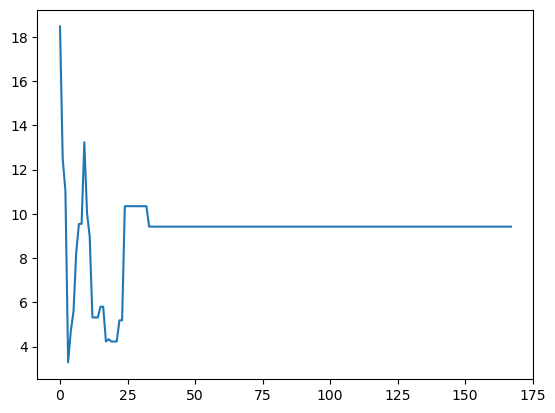

In [35]:
plt.plot(y_pred_h)

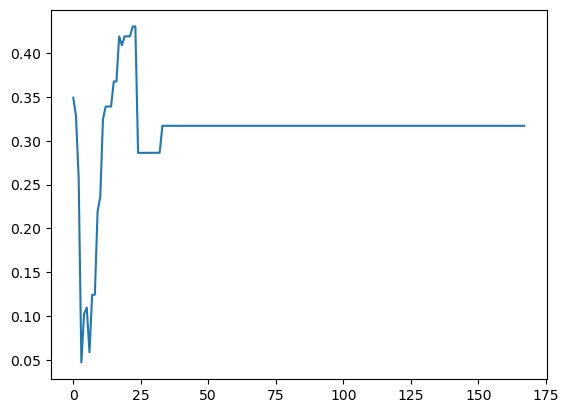

In [36]:
plt.plot(y_pred_v)

--- Stop ---

In [40]:
Y_data = test_data[0][1]
Y_data

,Waterlevel,Velocity
0,21.67,0.042958
1,12.74,0.046266
2,21.66,0.042558
3,12.71,0.044954
4,21.66,0.042558
...,...,...
331,12.31,0.030064
332,21.38,0.032728
333,12.31,0.030064
334,21.38,0.032728


In [41]:
Y_test = Y_data[Y_data['x'] == 0]
Y_test = Y_test.values
Y_test

KeyError: 'x'

In [27]:
Y_test_2016_2017

array([[ 0.01888235, 11.89      ],
       [ 0.01844587, 11.87      ],
       [ 0.0180173 , 11.85      ],
       ...,
       [ 0.03440052, 12.44      ],
       [ 0.03440052, 12.44      ],
       [ 0.03440052, 12.44      ]])

In [28]:
y_true_h = Y_test_2016_2017[:,1]
y_true_v = Y_test_2016_2017[:,0]

In [29]:
y_true_h

array([11.89, 11.87, 11.85, ..., 12.44, 12.44, 12.44])

In [30]:
y_true_v

array([0.01888235, 0.01844587, 0.0180173 , ..., 0.03440052, 0.03440052,
       0.03440052])

In [31]:
n = len(Y_test_2016_2017)
mse_h = np.mean(np.square(y_true_h - y_pred_h))
mse_v = np.mean(np.square(y_true_v - y_pred_v))

mse_h, mse_v

(0.42879322, 0.0028713248)

In [33]:
(mse_h + mse_v)/2

0.21583227813243866

In [34]:
SS_res_h = np.sum(np.square(y_true_h - y_pred_h)) 
SS_tot_h = np.sum(np.square(y_true_h - np.mean(y_true_h)))

NSE_h = 1 - SS_res_h/(SS_tot_h)
NSE_h

-0.38106958070518515

In [35]:
SS_res_v = np.sum(np.square(y_true_v - y_pred_v)) 
SS_tot_v = np.sum(np.square(y_true_v - np.mean(y_true_v)))

NSE_v = 1 - SS_res_v/(SS_tot_v)
NSE_v

-0.7006108458891884